# Analyzing IMDB Data in Keras

In [1]:
# Import Dependencies
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Lading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print("Shape of x_train:",x_train.shape)
print(x_train[0])

Shape of x_train: (25000, 1000)
[ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0

And we'll also one-hot encode the output.

In [5]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [58]:
from keras import regularizers
from keras import optimizers
# Build the model architecture
model = Sequential()
#model.add(Dense(2048, input_shape=(1000,)))
#model.add(Activation("relu"))
#model.add(Dense(1024, kernel_regularizer=regularizers.l2(1e-4)))
#model.add(Activation("relu"))
model.add(Dense(512, input_shape=(1000,), kernel_regularizer=regularizers.l2(1e-2)))
model.add(Activation("relu"))
model.add(Dense(256, kernel_regularizer=regularizers.l2(1e-2)))
model.add(Activation("relu"))
model.add(Dense(128, kernel_regularizer=regularizers.l2(1e-2)))
model.add(Activation("relu"))
model.add(Dense(64, kernel_regularizer=regularizers.l2(1e-2)))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(2))

# Compile the model using a loss function and an optimizer.
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 512)               512512    
_________________________________________________________________
activation_77 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_78 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_79 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 64)                8256      
__________

## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [ ]:
# Run the model. Feel free to experiment with different batch sizes and number of epochs.
history = model.fit(x_train, y_train, epochs=30, batch_size=64, verbose=2, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
10s - loss: 4.4157 - acc: 0.7369 - val_loss: 2.5560 - val_acc: 0.8174
Epoch 2/30
9s - loss: 2.3952 - acc: 0.7672 - val_loss: 2.0793 - val_acc: 0.8402
Epoch 3/30
9s - loss: 2.0099 - acc: 0.8194 - val_loss: 1.8396 - val_acc: 0.8344
Epoch 4/30
10s - loss: 1.8460 - acc: 0.8091 - val_loss: 1.6807 - val_acc: 0.8368
Epoch 5/30
10s - loss: 1.7011 - acc: 0.7964 - val_loss: 1.5064 - val_acc: 0.8440
Epoch 6/30
11s - loss: 1.4831 - acc: 0.8300 - val_loss: 1.3573 - val_acc: 0.8512
Epoch 7/30
9s - loss: 1.3055 - acc: 0.8433 - val_loss: 1.2686 - val_acc: 0.8192
Epoch 8/30
9s - loss: 1.1803 - acc: 0.8407 - val_loss: 1.4287 - val_acc: 0.5196
Epoch 9/30
10s - loss: 1.2316 - acc: 0.8080 - val_loss: 1.0854 - val_acc: 0.8480
Epoch 10/30
12s - loss: 1.0236 - acc: 0.8473 - val_loss: 0.9340 - val_acc: 0.8508
Epoch 11/30


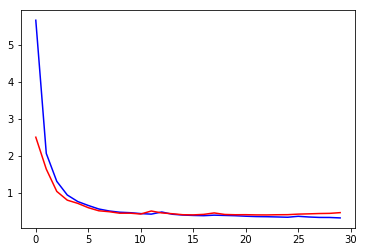

In [56]:
# Print the training loss and validation loss
plt.plot(history.history["loss"], color='b')
plt.plot(history.history["val_loss"], color='r')
plt.show()

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [57]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.83824


### Tune Model
<ul>
<li>Current Best One</li>
    <ul>
    <li>Test Accuracy: 0.85104</li>
    <li>Architecture: <br> 4 fully-connected hidden layers (nodes: 512, 256, 128, 64) + 1 fully-connected layer for logits (nodes:2)</li>
    <li>Hyperparameters: <br> learning rate (1e-4), batch size (128), epoch (30)</li>
    <li>Ways to prevent overfitting: <br> L2-regularization (penalty:1e-4) <br> Dropout rate (0.5)
    </li>
    </ul>
<li>First Try</li>
    <ul>
    <li>Architecture: <br> 6 fully-connected layers (nodes: 2048, 1024, 512, 256, 128, 64) + 1 fully-connected layer for logits</li>
    <li>Result</li>
        <ul>
        <li>It took 30s to run an epoch (not efficient) although it reach 80% validation accuracy at first epoch</li>
        </ul>
    </ul>
<li>How to tune it to the current one</li>
    <ul>
        <li>Try to modify the first layer (nodes: 2048, 1024 or 512)
        <br>It turns out that node-512 is a good choice considering the efficency
        </li>
        <li>Add dropout rate
        <br>At first, I try with rate 0.5. Then tune to 0.1, 0.3 if the model starts underfitting. Tune back to 0.5 or even 0.7 if overfitting.
        </li>
        <li>Add L2-Regularization
        <br>Start with 1e-4. If model starts overfitting, increase to 1e-2. If the model starts underfitting, consider tune back to 1e-4 or even 1e-5.
        </li>
        <li>How about Optimizer:
        <br>In this case, I also tried Adagrad and SGD, but it seemed that Adam (with default parameters) always did well in what I've tried.
        </li>
        <li>How about other hyper-parameters?
        <br>At some architectures, it only needs 10 epochs to get validation accuracy nearly 85%. After adding L2-regularization and increase dropout rate, it would take around 20% to get a stable validation accuracy 85%.
        <br>Set batch size to 128 or 64 can get good result at first few epochs.
        </li>
    </ul>
</ul>